In [1]:
try:
    %tensorflow_version 2.x
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

Note: not using Google CoLab


In [2]:
%matplotlib inline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
# Regression chart.
def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

In [13]:
# Read the data set
df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/jh-simple-dataset.csv",
    na_values=['NA','?'])

In [14]:
# Generate dummies for job
df = pd.concat([df,pd.get_dummies(df['job'],prefix="job",dtype=int)],axis=1)
df.drop('job', axis=1, inplace=True)
# Generate dummies for area
df = pd.concat([df,pd.get_dummies(df['area'],prefix="area",dtype=int)],axis=1)
df.drop('area', axis=1, inplace=True)

# Generate dummies for product
df = pd.concat([df,pd.get_dummies(df['product'],prefix="product",dtype=int)],axis=1)
df.drop('product', axis=1, inplace=True)

# Missing values for income
med = df['income'].median()
df['income'] = df['income'].fillna(med)

# Standardize ranges
df['income'] = zscore(df['income'])
df['aspect'] = zscore(df['aspect'])
df['save_rate'] = zscore(df['save_rate'])
df['subscriptions'] = zscore(df['subscriptions'])

# Convert to numpy - Classification
x_columns = df.columns.drop('age').drop('id')
x = df[x_columns].values
y = df['age'].values

In [15]:
display(df)

,id,income,aspect,subscriptions,dist_healthy,save_rate,dist_unhealthy,age,pop_dense,retail_dense,...,area_b,area_c,area_d,product_a,product_b,product_c,product_d,product_e,product_f,product_g
0,1,-0.607550,-0.664918,-0.208449,9.017895,-0.215764,11.738935,49,0.885827,0.492126,...,0,1,0,0,1,0,0,0,0,0
1,2,0.338053,-0.207748,0.839031,7.766643,0.196869,6.805396,51,0.874016,0.342520,...,0,1,0,0,0,1,0,0,0,0
2,3,-0.184205,1.127906,-0.208449,3.632069,-0.714362,13.671772,44,0.944882,0.724409,...,0,1,0,0,1,0,0,0,0,0
3,4,-0.526467,-0.440815,-0.208449,5.372942,-0.542432,4.333286,50,0.889764,0.444882,...,0,1,0,0,1,0,0,0,0,0
4,5,-2.851675,1.638861,1.886511,3.822477,-0.473660,5.967121,38,0.744094,0.661417,...,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,-0.593504,1.414758,-0.208449,5.454545,-0.232957,14.013489,41,0.881890,0.744094,...,0,1,0,0,1,0,0,0,0,0
1996,1997,-3.028085,1.011372,0.839031,3.632069,-0.473660,8.380497,38,0.944882,0.877953,...,0,0,1,1,0,0,0,0,0,0
1997,1998,-2.826971,1.513363,1.886511,7.168218,0.884591,4.626950,36,0.759843,0.744094,...,0,0,1,0,0,0,0,0,1,0
1998,1999,1.093101,-1.274478,-1.255928,8.936292,-0.370502,3.281439,46,0.909449,0.598425,...,0,1,0,0,0,1,0,0,0,0


In [16]:
# Create train/test
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.25, random_state=42)


In [18]:
# Build the neural network
model = Sequential()
model.add(Dense(25, input_dim=x.shape[1], activation='relu')) # Hidden 1
model.add(Dense(10, activation='relu')) # Hidden 2
model.add(Dense(1)) # Output
model.compile(loss='mean_squared_error', optimizer='adam') # Modify here
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
                        verbose=1, mode='auto', restore_best_weights=True)
model.fit(x_train,y_train,validation_data=(x_test,y_test),
          callbacks=[monitor],verbose=1,epochs=1000)

Epoch 1/1000
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1856.2451 - val_loss: 1411.2688
Epoch 2/1000
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1195.0109 - val_loss: 458.9049
Epoch 3/1000
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 367.6988 - val_loss: 251.9515
Epoch 4/1000
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 236.1468 - val_loss: 206.2058
Epoch 5/1000
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 201.0395 - val_loss: 169.8992
Epoch 6/1000
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 157.8730 - val_loss: 139.5538
Epoch 7/1000
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 131.2739 - val_loss: 115.2930
Epoch 8/1000
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 107.5265 - val_loss: 95.4971
Epoch 9/1000
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 86.1215 - val_loss: 80.5102
Epoch 10/1000
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 75.4332 - val_loss: 68.9533
Epoch 11/1000
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 59.4470 - val_loss: 60.0607
Epoch 12/100

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


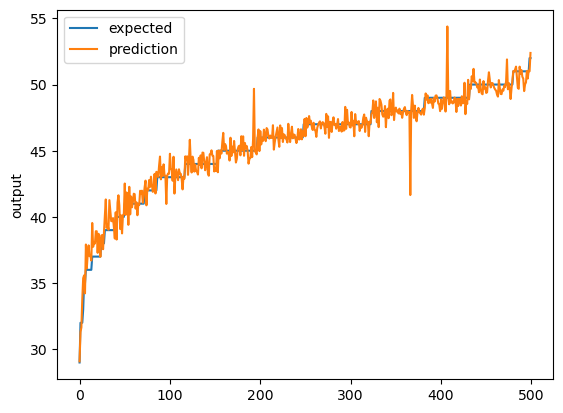

In [19]:
# Plot the chart
pred = model.predict(x_test)
chart_regression(pred.flatten(),y_test)